### Importing Libraries and Loading Dataset

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
df.set_index('Date', inplace=True)

In [7]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


In [8]:
df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

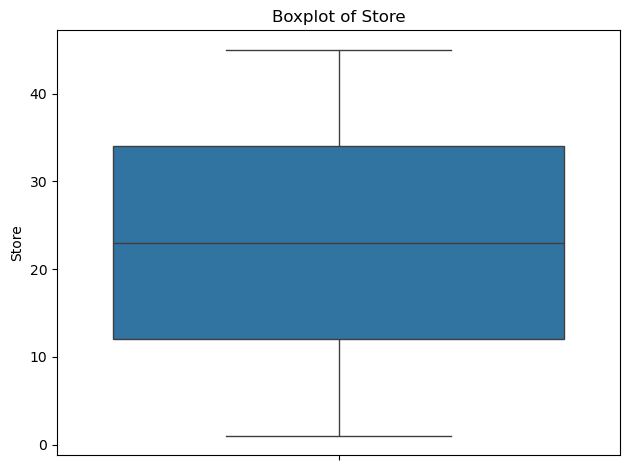

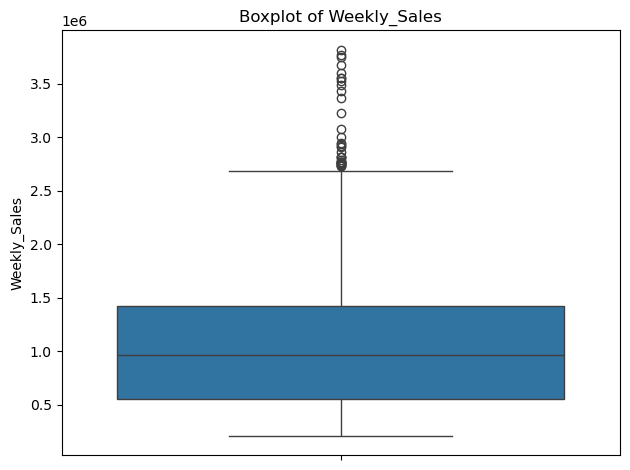

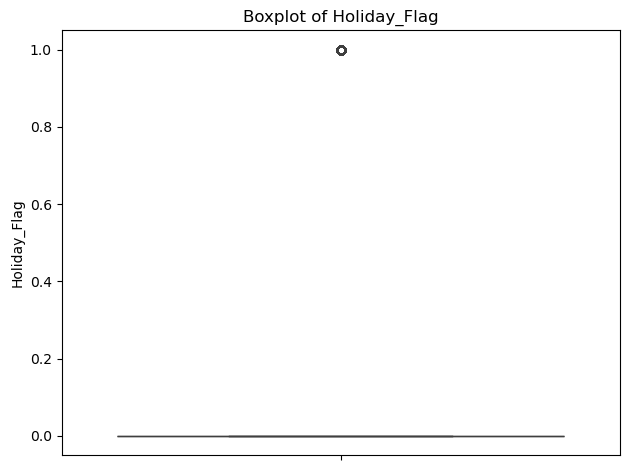

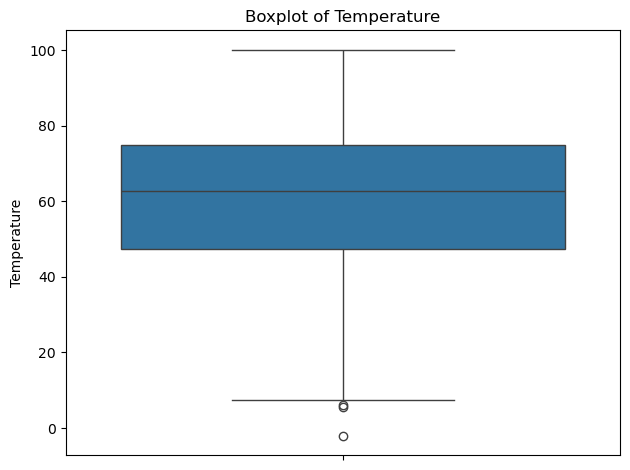

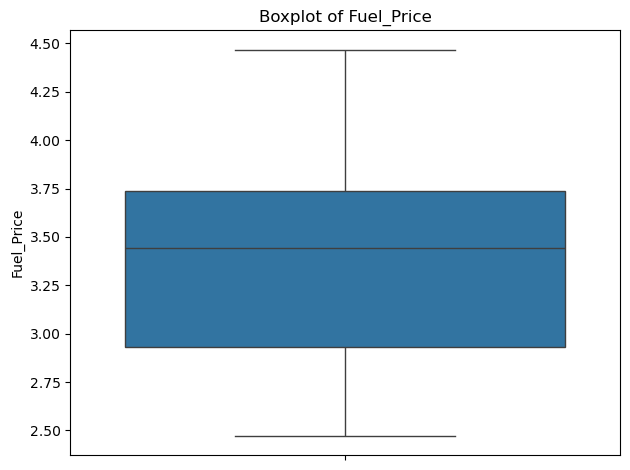

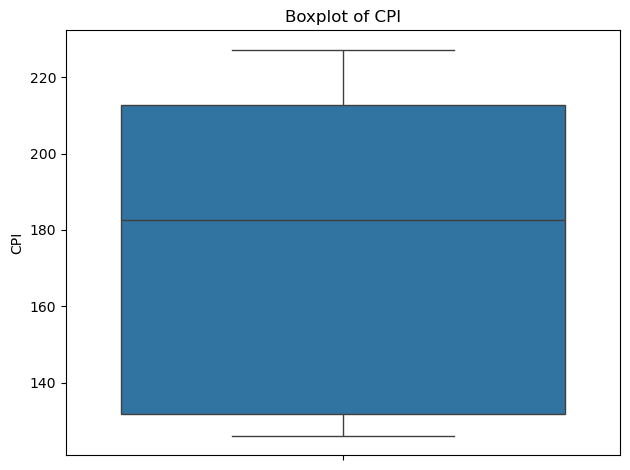

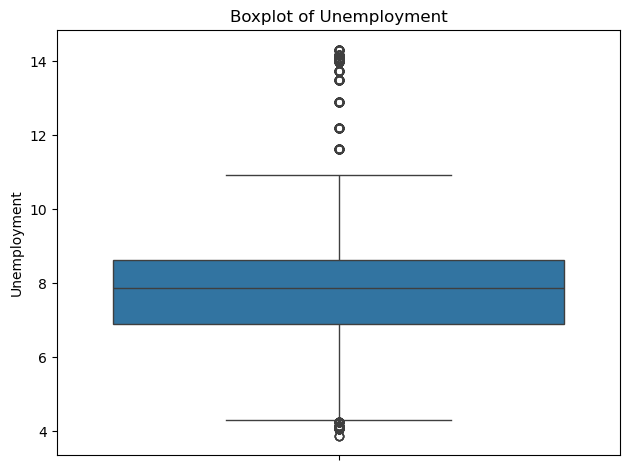

In [10]:
# Outlier Analysis

for col in df.columns:
  if df[col].dtypes != 'object':
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

* `Weekly_Sales` and `Unemployment` contain significant outliers.
* However, since this is real-world retail data, such values are valid and meaningful.
* So, I'm choosing not to remove them to preserve important patterns in the data.


### Questions:
### 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:


#### **A.** If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [11]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [12]:
df_1 = df[df['Store']==1].drop('Store', axis=1)
df_1

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573


In [13]:
df_1.corr()['Weekly_Sales']

Weekly_Sales    1.000000
Holiday_Flag    0.194905
Temperature    -0.222701
Fuel_Price      0.124592
CPI             0.225408
Unemployment   -0.097955
Name: Weekly_Sales, dtype: float64

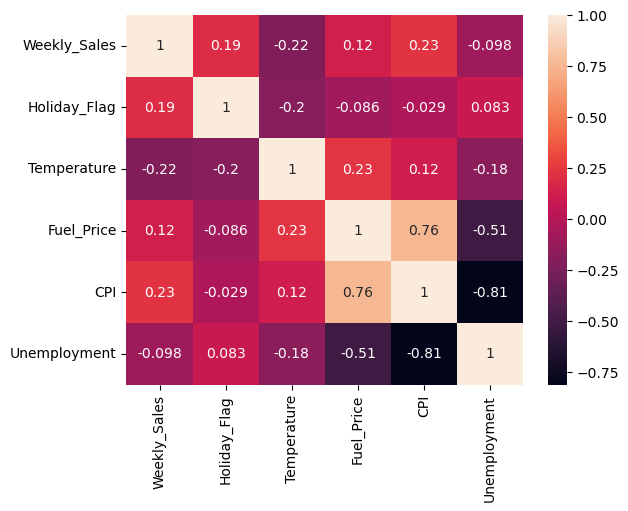

In [14]:
sns.heatmap(df_1.corr(), annot=True)
plt.show()

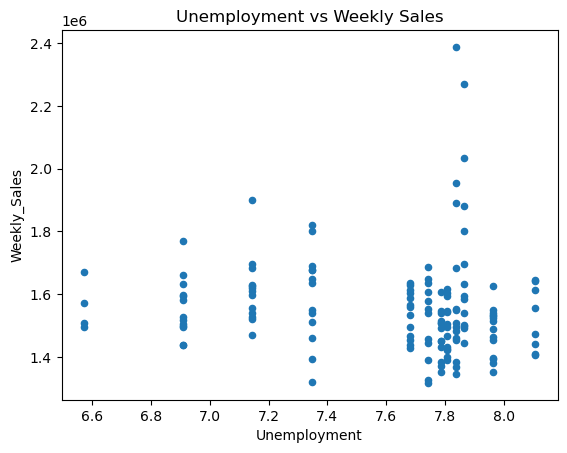

In [15]:
df_1.plot(kind='scatter', x='Unemployment', y='Weekly_Sales', title='Unemployment vs Weekly Sales')
plt.show()

In [16]:
# Calculating the correlation between weekly sales and unemployment

store_corrs = {}

for i in df['Store'].unique():
    df_filtered = df[df['Store'] == i].drop('Store', axis=1)
    corr = df_filtered.corr()['Weekly_Sales']
    store_corrs[i] = corr

store_unemp_df = pd.DataFrame(store_corrs).T['Unemployment']
store_unemp_df.index.name = 'Store'

store_unemp_df.head()

Store
1   -0.097955
2    0.066325
3   -0.230413
4   -0.337015
5   -0.207043
Name: Unemployment, dtype: float64

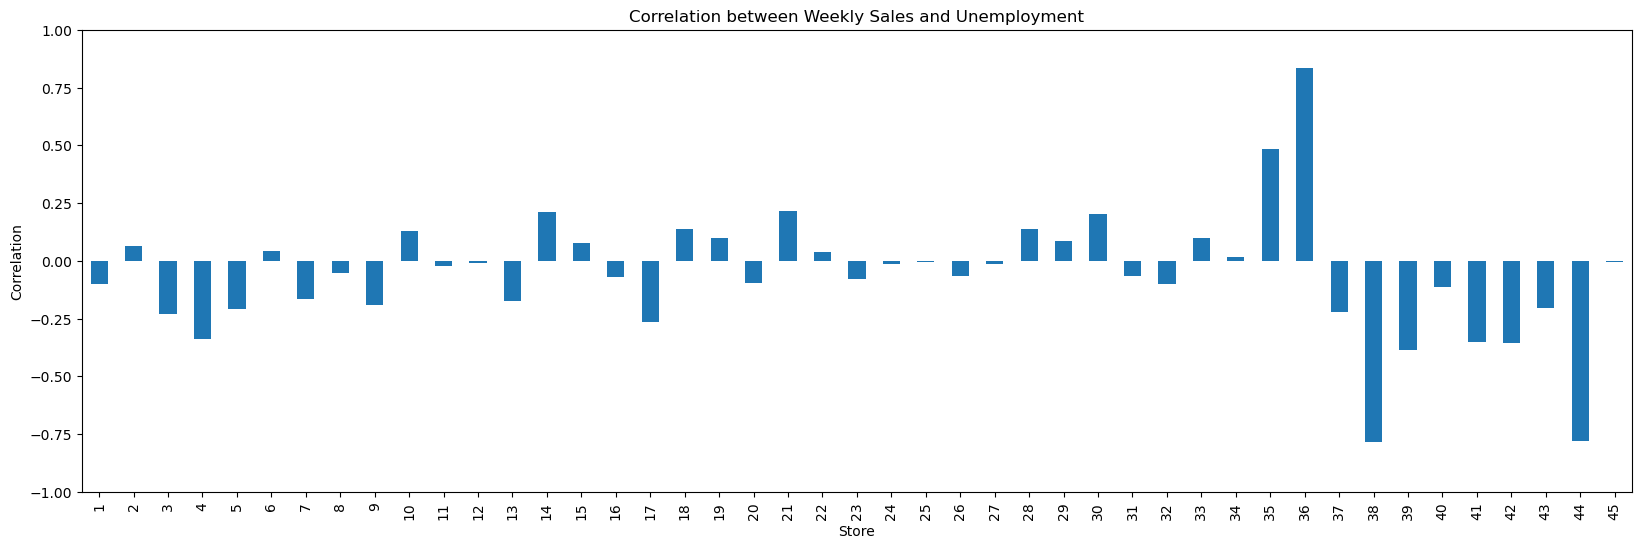

In [17]:
plt.figure(figsize=(20, 6))
store_unemp_df.plot(kind='bar', title='Correlation between Weekly Sales and Unemployment')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.ylim(-1,1)
plt.show()

- For some stores, a significant correlation is observed between Weekly_Sales and Unemployment.
- Thus, the Weekly_Sales of some stores are affected by the Unemployment rates.
- To identify the most affected stores, we sort the correlations by absolute value.


In [18]:
store_corrs_sorted = store_unemp_df.reindex(
    store_unemp_df.abs().sort_values(ascending=False).index)
store_corrs_sorted.head()

Store
36    0.833734
38   -0.785290
44   -0.780076
35    0.483865
39   -0.384681
Name: Unemployment, dtype: float64

- Store number 36 shows a significant positive correlation between Weekly_Sales and Unemployment rate.
    - This suggests that an increase in unemployment near Store 36 is associated with an increase in its weekly sales.
- Stores 38 and 44 show a significant negative correlation between Weekly_Sales and Unemployment rates.
    - This means that higher unemployment in those areas is linked to a decrease in their weekly sales.
- In conclusion, the effect of unemployment on Weekly_Sales varies across stores:
    - Some stores show a positive relationship,
    - Some show a negative relationship,
    - And some show no significant effect at all.

#### **B**. If the weekly sales show a seasonal trend, when and what could be the reason?

Let's first check for `Store 1`.

In [19]:
df_time_series = df_1['Weekly_Sales']
df_time_series

Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
                 ...    
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64

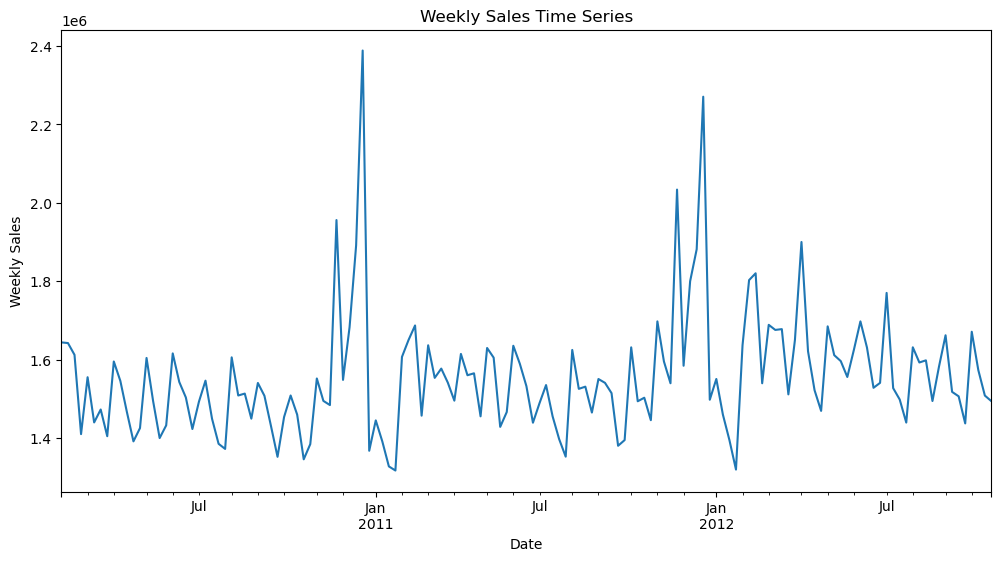

In [20]:
df_time_series.plot(figsize=(12, 6))
plt.title('Weekly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

- The above graph shows a seasonality with a clear spike in Weekly_Sales around the year-end.
- We can confirm this with stat tools

<Figure size 1000x600 with 0 Axes>

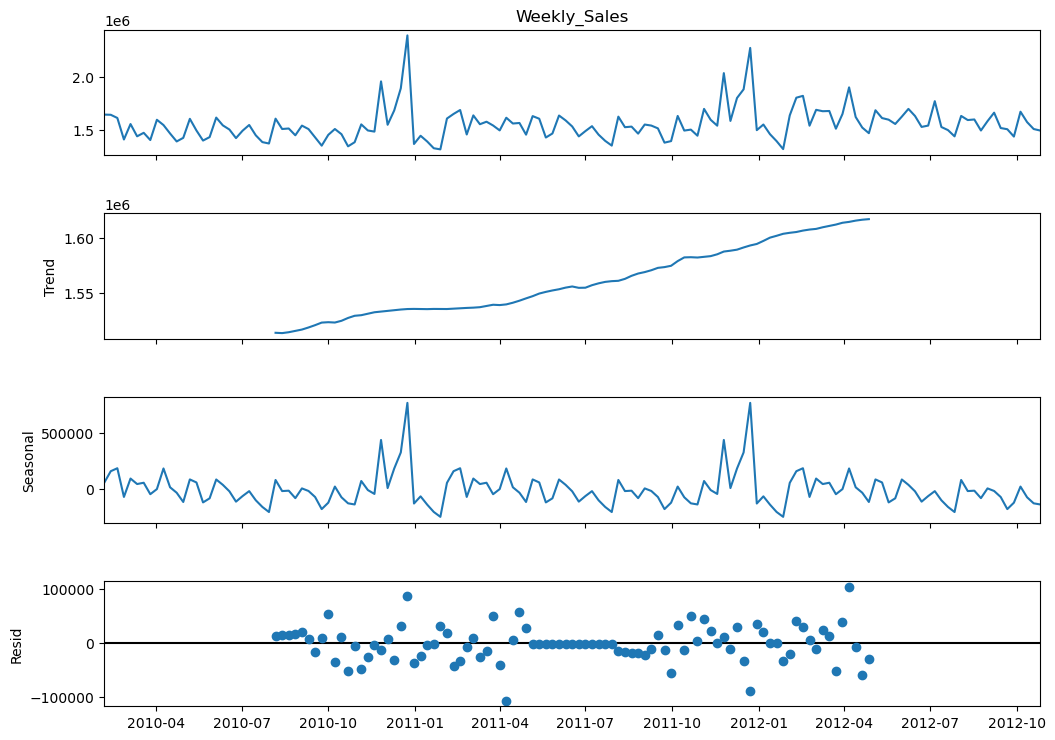

In [21]:
# Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10, 6))
decomposition = seasonal_decompose(df_time_series, model='additive')
decomposition.plot().set_size_inches(12, 8)
plt.show()

- The seasonal decomposition suggests a clear seasonality in the Weekly_Sales of Store 1.
- This seasonal spike appears around the year-end, indicating a yearly seasonal pattern.
- A likely reason could be the holidays and festivities during this period, especially Christmas and New Year's celebrations.

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasons ={}

for store_id in df['Store'].unique():
    series = df[df['Store'] == store_id]['Weekly_Sales']
    decomposition = seasonal_decompose(series, model='additive', period=52, extrapolate_trend='freq')
    season = decomposition.seasonal.idxmax()
    seasons[store_id] = season

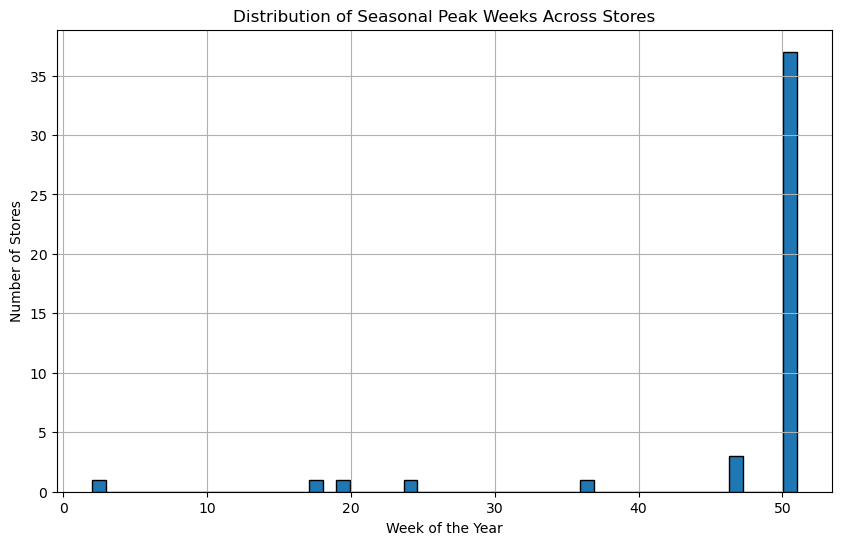

In [23]:
peak_df = pd.Series(seasons).reset_index()
peak_df.columns = ['Store', 'PeakDate']

# Plot histogram by week
peak_df['Week'] = peak_df['PeakDate'].dt.isocalendar().week

plt.figure(figsize=(10, 6))
plt.hist(peak_df['Week'], bins=52, edgecolor='black')
plt.title('Distribution of Seasonal Peak Weeks Across Stores')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Stores')
plt.grid(True)
plt.show()

- Yes, the weekly sales data for a majority of the 45 stores exhibit seasonality, as determined through time series decomposition.
- The seasonal peaks are mainly observed around the weeks corresponding to late November and December, suggesting a holiday-related sales spike. This aligns with the retail behavior observed during festivities like Thanksgiving, Christmas, and New Year's.

#### **C**. Does temperature affect the weekly sales in any manner?

In [24]:
df_1.corr()['Weekly_Sales']

Weekly_Sales    1.000000
Holiday_Flag    0.194905
Temperature    -0.222701
Fuel_Price      0.124592
CPI             0.225408
Unemployment   -0.097955
Name: Weekly_Sales, dtype: float64

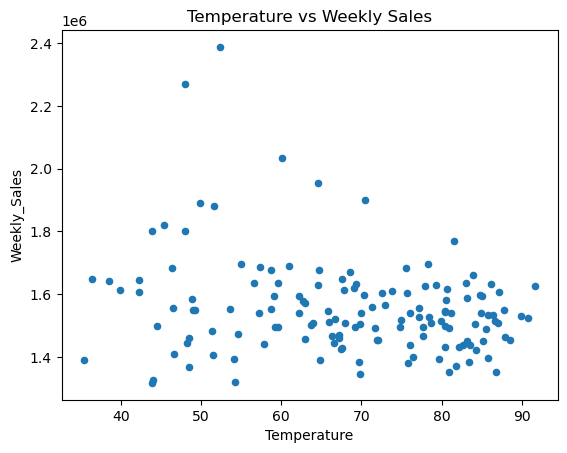

In [25]:
df_1.plot(kind='scatter', x='Temperature', y='Weekly_Sales', title='Temperature vs Weekly Sales')
plt.show()

In [26]:
# Calculating the correlation between weekly sales and Temperature

store_corrs_t = {}

for i in df['Store'].unique():
    df_filtered = df[df['Store'] == i].drop('Store', axis=1)
    corr = df_filtered.corr()['Weekly_Sales']
    store_corrs_t[i] = corr

store_temp_df = pd.DataFrame(store_corrs_t).T['Temperature']
store_temp_df.index.name = 'Store'

store_temp_df.head()

Store
1   -0.222701
2   -0.297673
3   -0.377524
4   -0.225583
5   -0.175517
Name: Temperature, dtype: float64

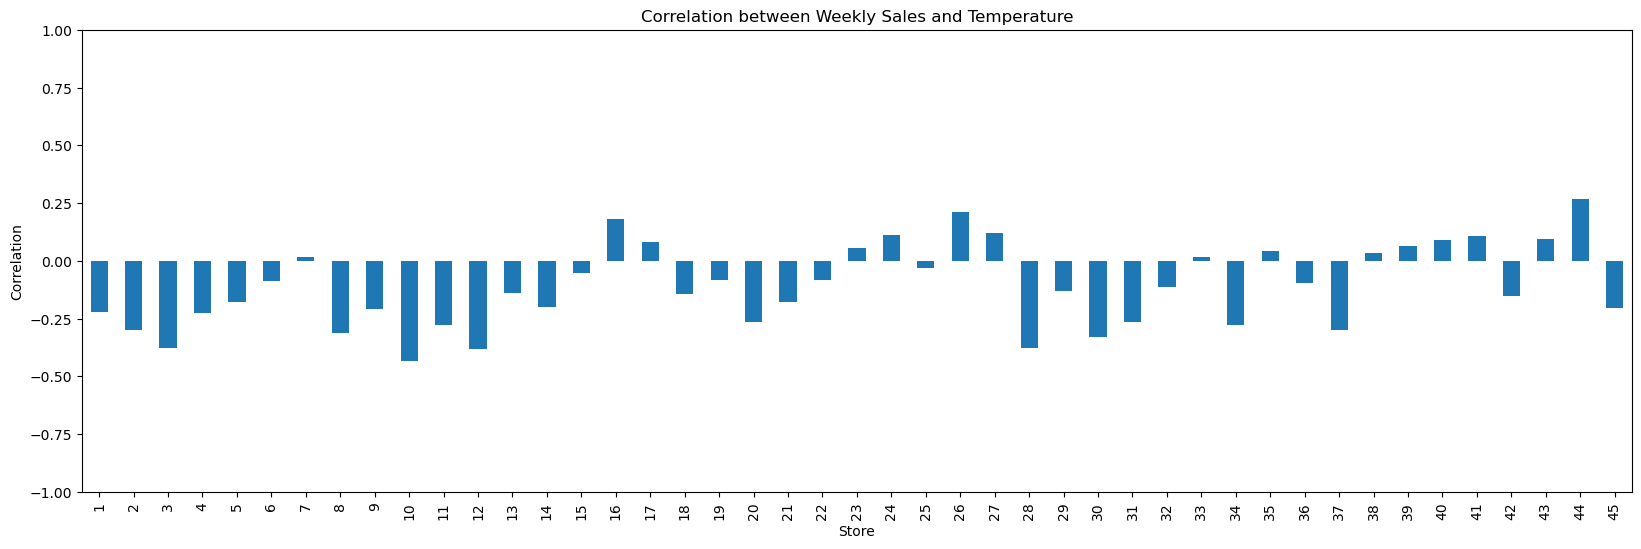

In [27]:
plt.figure(figsize=(20, 6))
store_temp_df.plot(kind='bar', title='Correlation between Weekly Sales and Temperature')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.ylim(-1, 1)
plt.show()

- Based on the above graph, it is evident that, there is no sigificant correlation between Weekly_Sales and Temperature.
- This indicating that temperature may not have a strong influence on the Weekly_sales patterns.

#### **D.** How is the Consumer Price index affecting the weekly sales of various stores?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [29]:
df_1.corr()['Weekly_Sales']

Weekly_Sales    1.000000
Holiday_Flag    0.194905
Temperature    -0.222701
Fuel_Price      0.124592
CPI             0.225408
Unemployment   -0.097955
Name: Weekly_Sales, dtype: float64

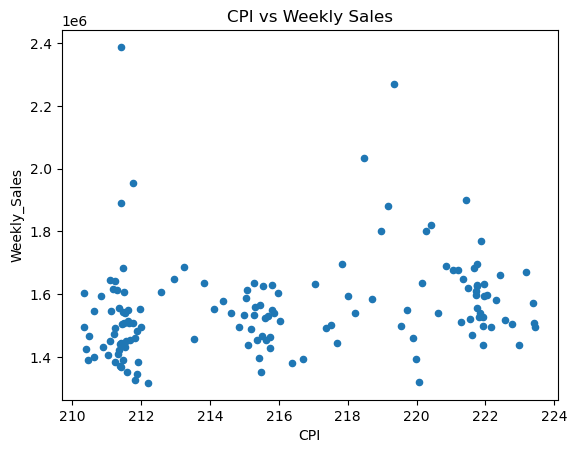

In [30]:
df_1.plot(kind='scatter', x='CPI', y='Weekly_Sales', title='CPI vs Weekly Sales')
plt.show()

In [31]:
# Calculating the correlation between weekly sales and CPI
store_corrs_cpi = {}

for i in df['Store'].unique():
    df_filtered = df[df['Store'] == i].drop('Store', axis=1)
    corr = df_filtered.corr()['Weekly_Sales']
    store_corrs_cpi[i] = corr

store_cpi_df = pd.DataFrame(store_corrs_cpi).T['CPI']
store_cpi_df.index.name = 'Store'
store_cpi_df.head()

Store
1    0.225408
2   -0.062431
3    0.317250
4    0.351157
5    0.308261
Name: CPI, dtype: float64

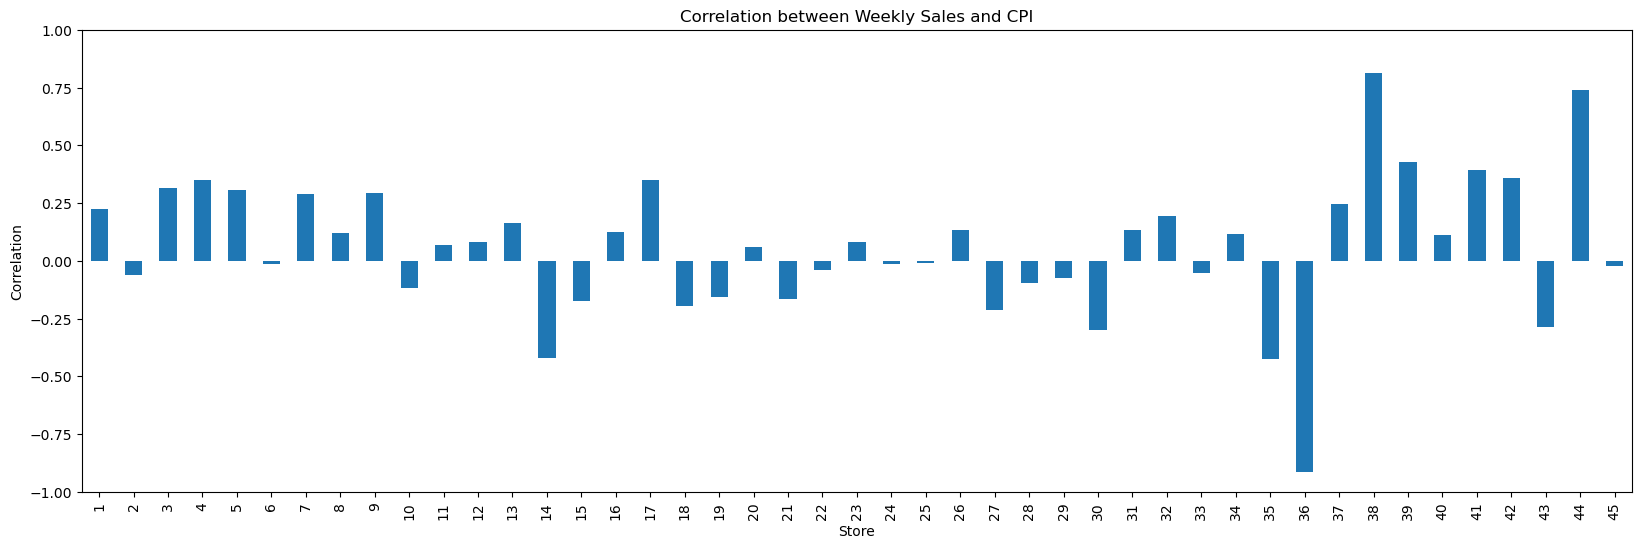

In [32]:
plt.figure(figsize=(20, 6))
store_cpi_df.plot(kind='bar', title='Correlation between Weekly Sales and CPI')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.ylim(-1, 1)
plt.show()

In [33]:
store_corrs_sorted = store_cpi_df.reindex(
    store_cpi_df.abs().sort_values(ascending=False).index)
store_corrs_sorted.head()

Store
36   -0.915095
38    0.812837
44    0.740150
39    0.428043
35   -0.424107
Name: CPI, dtype: float64

- Although the Consumer Price Index (CPI) does not appear to have a strong influence on Weekly_Sales for most stores, there are a few notable exceptions.
- For instance, Stores 38 and 44 exhibit a strong positive correlation between CPI and Weekly_Sales, while Store 36 shows a very strong negative correlation.
- This suggests that in some stores, an increase in CPI is associated with a rise in Weekly_Sales, whereas in others, it corresponds to a decline.
- However, CPI does not appears to impact sales significantly for most stores.

#### **E**. Top performing stores according to the historical data.

In [34]:
top_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(top_store.head(1))  # Top performing store by total sales

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64


In [35]:
avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
print(avg_sales.head(1))  # Top 1 by weekly performance

Store
20    2.107677e+06
Name: Weekly_Sales, dtype: float64


The top performing store is `Store 20`.

#### **F.** The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [36]:
worst_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)
worst_store.head(1)  # Worst performing store by total sales

Store
33    37160221.96
Name: Weekly_Sales, dtype: float64

In [37]:
avg_sales_asc = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=True)
avg_sales_asc.head(1)  # Worst by weekly performance

Store
33    259861.692028
Name: Weekly_Sales, dtype: float64

In [38]:
# Difference between top and bottom-performing stores
diff = top_store.iloc[0] - worst_store.iloc[0]
print(diff.round(2))

264237570.5


- The worst-performing store is `Store 33`.
- The difference between the highest and lowest performing stores by total_sales is `264237570.5`.

### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [39]:
df_1

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573


In [40]:
df1 = df_1['Weekly_Sales']
df1

Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
                 ...    
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64

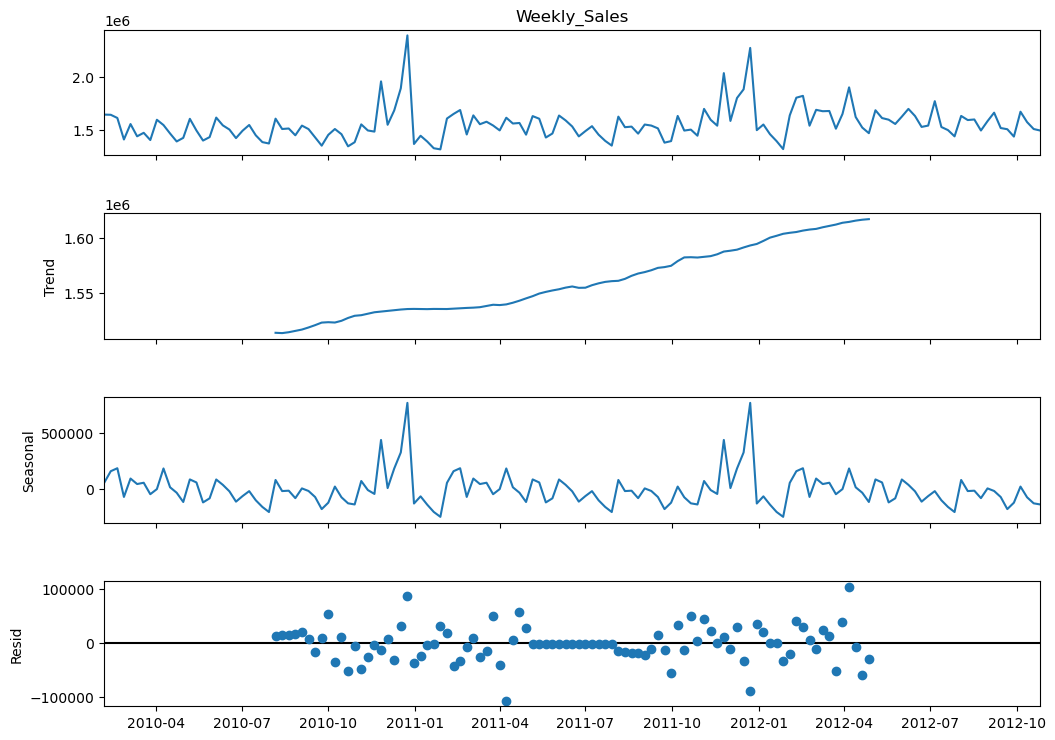

In [41]:
# Seasonal Decomposition

decompose = seasonal_decompose(df1)
decompose.plot().set_size_inches(12, 8)
plt.show()

- From the above graphs, we can see that seasonality and trend are present in the data, which suggests non-stationarity.
- We will check this statistically, using the ADF Test

In [42]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df1)
p_value = adf_test[1]
print('p-value:', p_value)

p-value: 1.3877788330759307e-05


In [43]:
if p_value>0.05:
  print("Data is non stationary")
else:
  print("Data is stationary")

Data is stationary


Based on the ADF Test, we will proceed with no differencing (d=0), since the data is stationary.

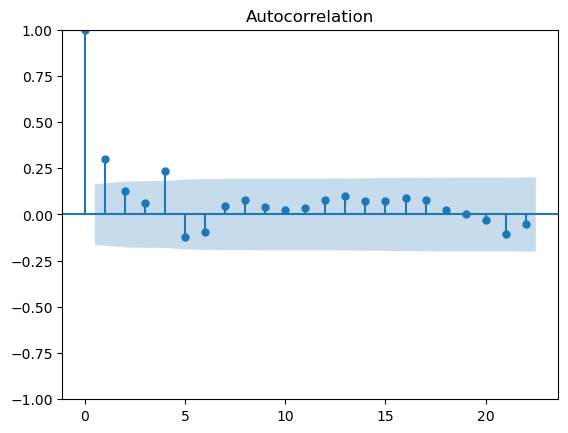

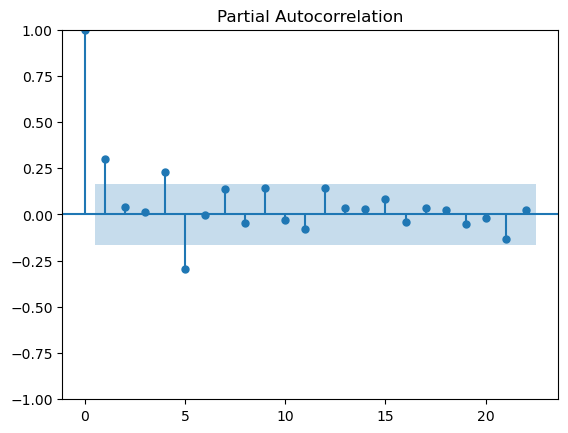

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1)
plot_pacf(df1)
plt.show()

From ACF and PACF plots, we can see that the possible values for **p** & **q** are 1 and 2. we will proceed with the ARIMA configuration (2, 0, 2) as our initial choice for the (p, d, q) parameters.

In [45]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df1, order=(2, 0, 2))
model_fit = model.fit()

# Summary
print(model_fit.summary())

D:\Anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
D:\Anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
D:\Anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1895.106
Date:                Thu, 10 Apr 2025   AIC                           3802.213
Time:                        01:09:16   BIC                           3819.990
Sample:                    02-05-2010   HQIC                          3809.437
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.555e+06   1.98e+04     78.529      0.000    1.52e+06    1.59e+06
ar.L1         -0.9335      0.127     -7.323      0.000      -1.183      -0.684
ar.L2         -0.3905      0.114     -3.438      0.0

In [46]:
# Forecast next 12 weeks
forecast = model_fit.forecast(steps=12)

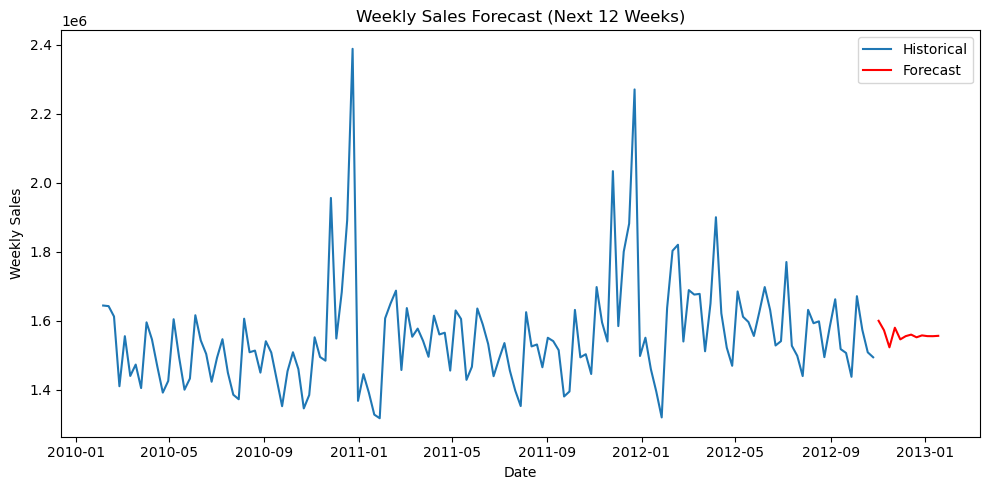

In [47]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df1, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Weekly Sales Forecast (Next 12 Weeks)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

Since seasonality is present, we will proceed with SARIMA, to account for seasonal patterns in the time series.

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(df1, order=(2, 0, 2), seasonal_order=(2, 0, 2, 52)) # 52 since there are 52 weeks in a year, and seasonality is yearly in our case
sarimax_model_fit = sarimax_model.fit()

D:\Anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
D:\Anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [49]:
forecast_sarima = sarimax_model_fit.forecast(steps=12)
forecast_sarima

2012-11-02    1.677951e+06
2012-11-09    1.611991e+06
2012-11-16    1.577305e+06
2012-11-23    1.898659e+06
2012-11-30    1.606379e+06
2012-12-07    1.743731e+06
2012-12-14    1.801481e+06
2012-12-21    2.059146e+06
2012-12-28    1.544725e+06
2013-01-04    1.579654e+06
2013-01-11    1.521437e+06
2013-01-18    1.478341e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

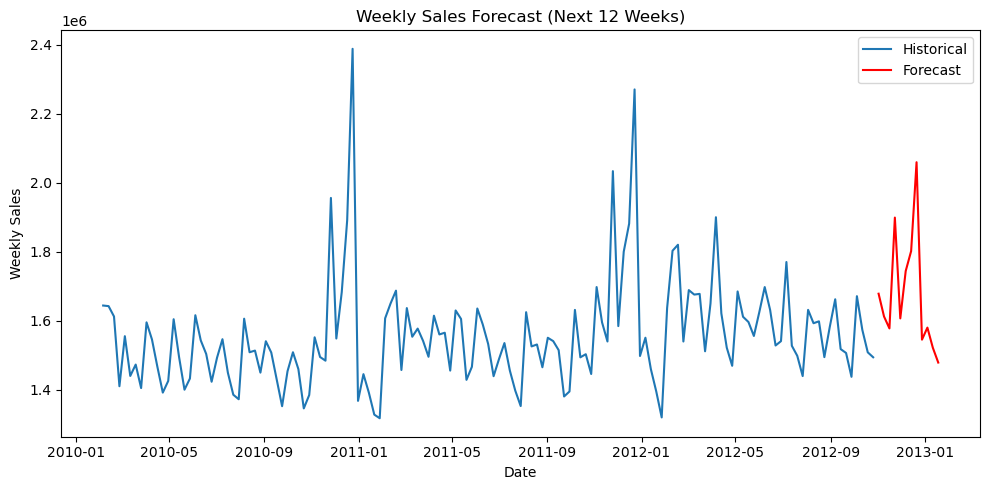

In [50]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df1, label='Historical')
plt.plot(forecast_sarima, label='Forecast', color='red')
plt.title('Weekly Sales Forecast (Next 12 Weeks)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

D:\Anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
D:\Anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
D:\Anaconda_3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


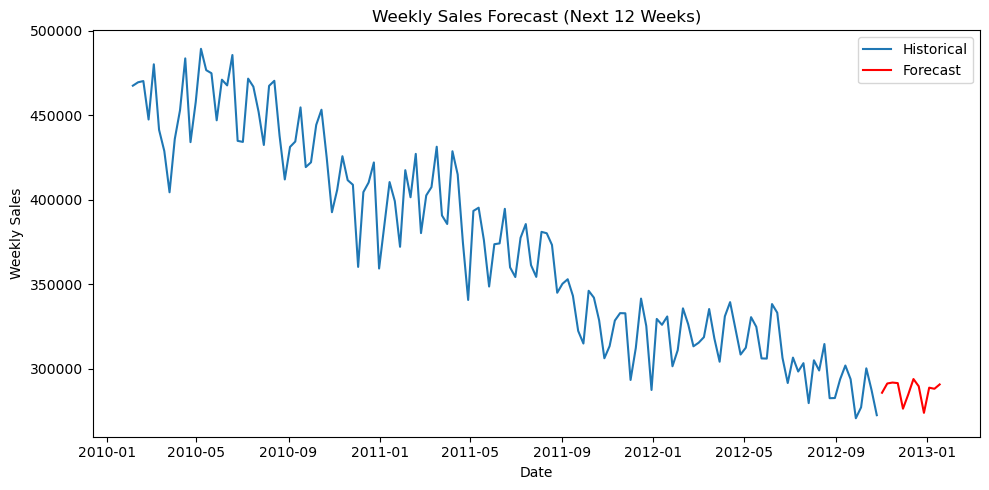

In [51]:
df2 = df[df['Store']==36]['Weekly_Sales']
sarimax_model = SARIMAX(df2, order=(2, 0, 2), seasonal_order=(2, 1, 2, 52))
sarimax_model_fit = sarimax_model.fit()

forecast_sarima = sarimax_model_fit.forecast(steps=12)

plt.figure(figsize=(10, 5))
plt.plot(df2, label='Historical')
plt.plot(forecast_sarima, label='Forecast', color='red')
plt.title('Weekly Sales Forecast (Next 12 Weeks)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

Using Auto Arima to find optimal sarima parameters.

Forcast for `Store 1`

In [52]:
from pmdarima import auto_arima

In [53]:
model = auto_arima(df1,  # Only the target series!
                   seasonal=True,
                   m=52,
                   stepwise=True,
                   suppress_warnings=True,
                   error_action='ignore')

In [54]:
forecast_auto = model.predict(n_periods=12)
forecast_auto.to_frame(name='Forecast')

,Forecast
2012-11-02,1.638781e+06
2012-11-09,1.596926e+06
2012-11-16,1.573151e+06
2012-11-23,1.818433e+06
2012-11-30,1.597295e+06
2012-12-07,1.703985e+06
2012-12-14,1.744323e+06
2012-12-21,1.936403e+06
2012-12-28,1.554968e+06
2013-01-04,1.581093e+06


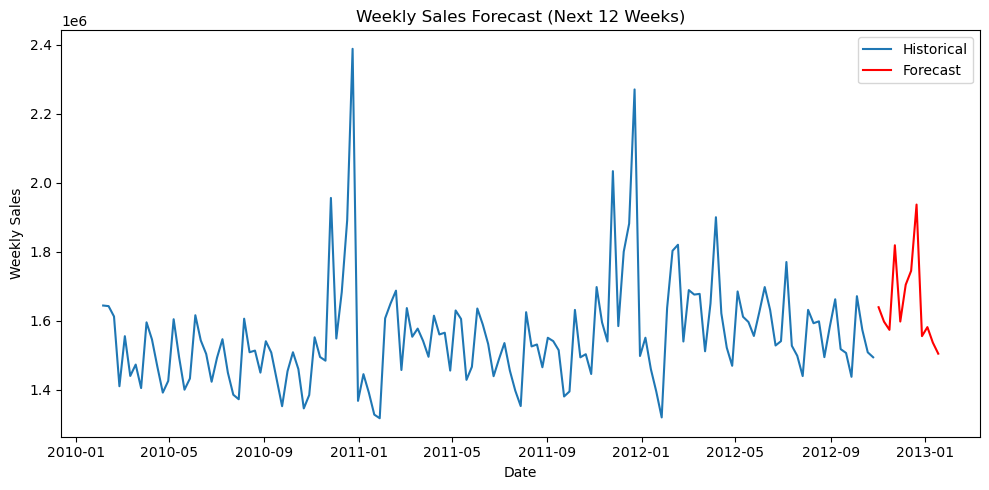

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(df1, label='Historical')
plt.plot(forecast_auto, label='Forecast', color='red')
plt.title('Weekly Sales Forecast (Next 12 Weeks)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# Non-seasonal orders (p, d, q)
print("Optimal (p,d,q):", model.order)
# Seasonal orders (P, D, Q, m)
print("Optimal (P,D,Q,m):", model.seasonal_order)

Optimal (p,d,q): (1, 1, 1)
Optimal (P,D,Q,m): (1, 0, 0, 52)


Forcast of Store 36

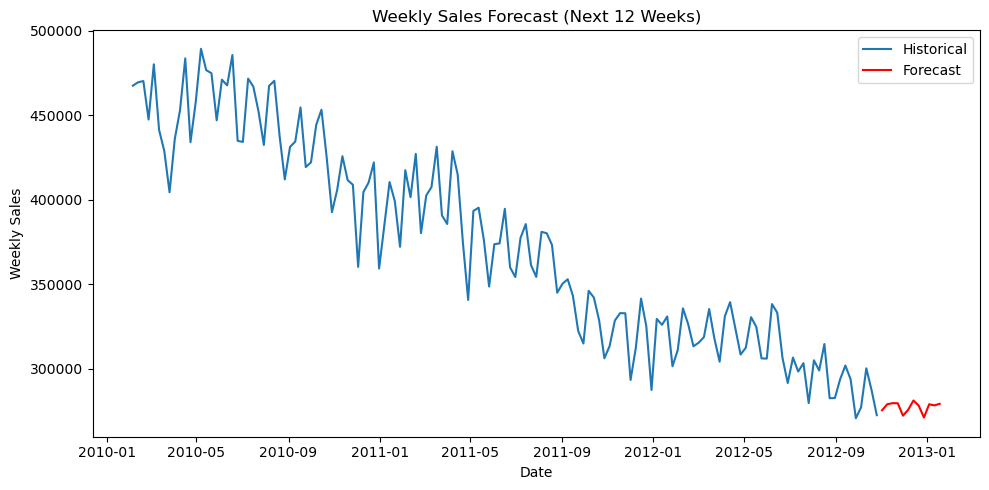

In [57]:
model = auto_arima(df2,
                   seasonal=True,
                   m=52,
                   stepwise=True,
                   suppress_warnings=True,
                   error_action='ignore')

forecast_auto = model.predict(n_periods=12)
forecast_auto.to_frame(name='Forecast')

plt.figure(figsize=(10, 5))
plt.plot(df2, label='Historical')
plt.plot(forecast_auto, label='Forecast', color='red')
plt.title('Weekly Sales Forecast (Next 12 Weeks)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
# Non-seasonal orders (p, d, q)
print("Optimal (p,d,q):", model.order)
# Seasonal orders (P, D, Q, m)
print("Optimal (P,D,Q,m):", model.seasonal_order)

Optimal (p,d,q): (2, 1, 0)
Optimal (P,D,Q,m): (1, 0, 0, 52)


##### Forecasting for each store

In [59]:
forecasts = {}

for store_id in df['Store'].unique():
    store_df = df[df['Store'] == store_id]
    store_df = store_df['Weekly_Sales']

    model = auto_arima(store_df,
                       seasonal=True,
                       m=52,
                       stepwise=True,
                       suppress_warnings=True,
                       error_action='ignore')

    forecast_auto = model.predict(n_periods=12)
    forecast_df = forecast_auto.to_frame(name = f'Store {store_id}')
    forecasts[store_id] = forecast_df

In [61]:
forecasts[2]

,Store 2
2012-11-02,1.973033e+06
2012-11-09,1.968333e+06
2012-11-16,1.896226e+06
2012-11-23,2.373569e+06
2012-11-30,1.962834e+06
2012-12-07,2.154104e+06
2012-12-14,2.246453e+06
2012-12-21,2.727643e+06
2012-12-28,1.911855e+06
2013-01-04,1.868496e+06


In [62]:
transposed_dict = {key: df.T for key, df in forecasts.items()}

final_df = pd.concat(transposed_dict, axis=0)
final_df.index

MultiIndex([( 1,  'Store 1'),
            ( 2,  'Store 2'),
            ( 3,  'Store 3'),
            ( 4,  'Store 4'),
            ( 5,  'Store 5'),
            ( 6,  'Store 6'),
            ( 7,  'Store 7'),
            ( 8,  'Store 8'),
            ( 9,  'Store 9'),
            (10, 'Store 10'),
            (11, 'Store 11'),
            (12, 'Store 12'),
            (13, 'Store 13'),
            (14, 'Store 14'),
            (15, 'Store 15'),
            (16, 'Store 16'),
            (17, 'Store 17'),
            (18, 'Store 18'),
            (19, 'Store 19'),
            (20, 'Store 20'),
            (21, 'Store 21'),
            (22, 'Store 22'),
            (23, 'Store 23'),
            (24, 'Store 24'),
            (25, 'Store 25'),
            (26, 'Store 26'),
            (27, 'Store 27'),
            (28, 'Store 28'),
            (29, 'Store 29'),
            (30, 'Store 30'),
            (31, 'Store 31'),
            (32, 'Store 32'),
            (33, 'Store 33'),
          

In [63]:
final_df

,,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18
1,Store 1,1.638781e+06,1.596926e+06,1.573151e+06,1.818433e+06,1.597295e+06,1.703985e+06,1.744323e+06,1.936403e+06,1.554968e+06,1.581093e+06,1.536289e+06,1.504101e+06
2,Store 2,1.973033e+06,1.968333e+06,1.896226e+06,2.373569e+06,1.962834e+06,2.154104e+06,2.246453e+06,2.727643e+06,1.911855e+06,1.868496e+06,1.834470e+06,1.810906e+06
3,Store 3,4.432954e+05,4.229069e+05,4.190564e+05,4.987952e+05,4.585377e+05,4.562465e+05,4.746728e+05,5.025153e+05,4.253888e+05,4.205698e+05,4.103684e+05,4.059233e+05
4,Store 4,2.237561e+06,2.201219e+06,2.226267e+06,2.645363e+06,2.193043e+06,2.373433e+06,2.517726e+06,3.015127e+06,2.097707e+06,2.120057e+06,2.061752e+06,2.096608e+06
5,Store 5,3.466177e+05,3.256821e+05,3.238706e+05,4.282412e+05,3.595860e+05,3.550076e+05,3.613191e+05,4.025412e+05,3.457219e+05,3.261386e+05,3.153815e+05,3.133314e+05
6,Store 6,1.525128e+06,1.561116e+06,1.536149e+06,2.026682e+06,1.649823e+06,1.794324e+06,1.880799e+06,2.286358e+06,1.590910e+06,1.456273e+06,1.422300e+06,1.410361e+06
7,Store 7,5.320893e+05,5.235689e+05,5.073798e+05,9.166291e+05,5.594612e+05,6.213987e+05,6.877955e+05,1.027269e+06,7.834688e+05,6.806709e+05,5.614287e+05,5.455561e+05
8,Store 8,9.357180e+05,9.223113e+05,8.971652e+05,1.132779e+06,9.603265e+05,1.007605e+06,1.050043e+06,1.282809e+06,8.759375e+05,8.855789e+05,8.486183e+05,8.463383e+05
9,Store 9,5.819916e+05,5.829473e+05,5.563455e+05,7.022471e+05,5.948958e+05,6.041984e+05,6.444000e+05,7.510335e+05,5.613062e+05,5.451930e+05,5.213825e+05,5.241402e+05
10,Store 10,1.817954e+06,1.991127e+06,1.882732e+06,2.550223e+06,2.025308e+06,2.242415e+06,2.323678e+06,2.949339e+06,1.919573e+06,1.763569e+06,1.785111e+06,1.755930e+06


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45 entries, (1, 'Store 1') to (45, 'Store 45')
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2012-11-02 00:00:00  45 non-null     float64
 1   2012-11-09 00:00:00  45 non-null     float64
 2   2012-11-16 00:00:00  45 non-null     float64
 3   2012-11-23 00:00:00  45 non-null     float64
 4   2012-11-30 00:00:00  45 non-null     float64
 5   2012-12-07 00:00:00  45 non-null     float64
 6   2012-12-14 00:00:00  45 non-null     float64
 7   2012-12-21 00:00:00  45 non-null     float64
 8   2012-12-28 00:00:00  45 non-null     float64
 9   2013-01-04 00:00:00  45 non-null     float64
 10  2013-01-11 00:00:00  45 non-null     float64
 11  2013-01-18 00:00:00  45 non-null     float64
dtypes: float64(12)
memory usage: 7.1+ KB


In [65]:
# Keep only the first level of the MultiIndex
final_df.index = final_df.index.get_level_values(1)

# Optionally, rename the index
final_df.index.name = 'Forecast for'
final_df

,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18
Forecast for,,,,,,,,,,,,
Store 1,1.638781e+06,1.596926e+06,1.573151e+06,1.818433e+06,1.597295e+06,1.703985e+06,1.744323e+06,1.936403e+06,1.554968e+06,1.581093e+06,1.536289e+06,1.504101e+06
Store 2,1.973033e+06,1.968333e+06,1.896226e+06,2.373569e+06,1.962834e+06,2.154104e+06,2.246453e+06,2.727643e+06,1.911855e+06,1.868496e+06,1.834470e+06,1.810906e+06
Store 3,4.432954e+05,4.229069e+05,4.190564e+05,4.987952e+05,4.585377e+05,4.562465e+05,4.746728e+05,5.025153e+05,4.253888e+05,4.205698e+05,4.103684e+05,4.059233e+05
Store 4,2.237561e+06,2.201219e+06,2.226267e+06,2.645363e+06,2.193043e+06,2.373433e+06,2.517726e+06,3.015127e+06,2.097707e+06,2.120057e+06,2.061752e+06,2.096608e+06
Store 5,3.466177e+05,3.256821e+05,3.238706e+05,4.282412e+05,3.595860e+05,3.550076e+05,3.613191e+05,4.025412e+05,3.457219e+05,3.261386e+05,3.153815e+05,3.133314e+05
Store 6,1.525128e+06,1.561116e+06,1.536149e+06,2.026682e+06,1.649823e+06,1.794324e+06,1.880799e+06,2.286358e+06,1.590910e+06,1.456273e+06,1.422300e+06,1.410361e+06
Store 7,5.320893e+05,5.235689e+05,5.073798e+05,9.166291e+05,5.594612e+05,6.213987e+05,6.877955e+05,1.027269e+06,7.834688e+05,6.806709e+05,5.614287e+05,5.455561e+05
Store 8,9.357180e+05,9.223113e+05,8.971652e+05,1.132779e+06,9.603265e+05,1.007605e+06,1.050043e+06,1.282809e+06,8.759375e+05,8.855789e+05,8.486183e+05,8.463383e+05
Store 9,5.819916e+05,5.829473e+05,5.563455e+05,7.022471e+05,5.948958e+05,6.041984e+05,6.444000e+05,7.510335e+05,5.613062e+05,5.451930e+05,5.213825e+05,5.241402e+05
